По мотивам главы 15 "Автокодировщики" из "Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow."

In [8]:
import tensorflow as tf
print('TensorFlow version: ',tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


from sklearn.preprocessing import StandardScaler

TensorFlow version:  1.13.1


**Линейный автокодировщик**

Структура:
* Вход (3 элемента)
  * Скрытый слой с линейной активацией (2 элемента)
* Выход (3 элемента)

*Построение исходных данных*

In [17]:
# трехмерный набор данных, который в дальнейшем будет аппроксимирован двухмерным, 
# с помощью подохдящей плоскости проекции.

np.random.seed(42)
m = 200 #число объектов
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m)*3*np.pi/2 - 0.5 #rand(n) - n случайных элементов в диапазоне от [0, 1)
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise*np.random.randn(m)/2
data[:, 1] = np.sin(angles)*0.7 + noise*np.random.randn(m)/2
data[:, 2] = data[:, 0]*w1 + data[:, 1]*w2 + noise*np.random.randn(m)


In [20]:
data[:3, :]

array([[ 0.74387226,  0.71040376,  0.40428656],
       [-1.02876931, -0.5285658 , -0.23600459],
       [-0.87145573,  0.13272972, -0.01356639]])

In [23]:
#Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.fit_transform(data[:100])

In [28]:
X_train[:3, :]

array([[ 0.69721098,  1.34761529,  1.67654698],
       [-1.3249395 , -1.8596241 , -1.59601678],
       [-1.14548318, -0.14777168, -0.45912276]])

In [29]:
tf.reset_default_graph()

*Определим структуру графа нейросети*

In [31]:
#Структура: 3 слоя - входной, скрытый и выходной.
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape = [None, n_inputs])
hidden = tf.layers.dense(inputs = X, units = n_hidden) #activation = None (по умолчанию) чтобы сохранить линейность
outputs = tf.layers.dense(inputs = hidden, units = n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) #MSE ошибкакодирования/декодирования
optimizer = tf.train.AdamOptimizer(learning_rate)
step = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


*Исполняемая часть*

In [33]:
n_iterations = 1000
codings = hidden #выход скрытого слоя предоставляет кодировки

with tf.Session() as sees:
    init.run()
    for iteration in range(n_iterations):
        step.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})



*Визуализация результата*

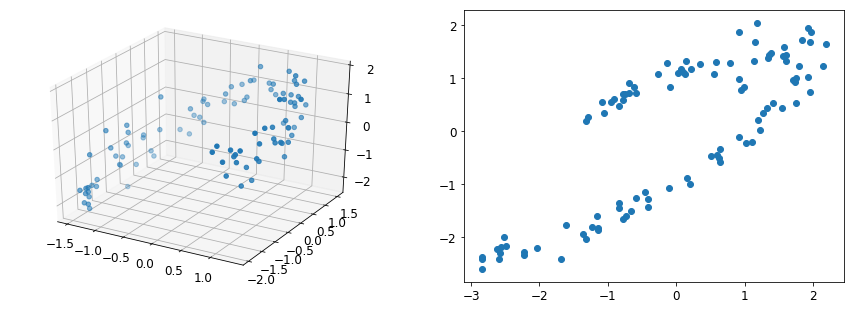

In [49]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(121, projection = '3d') # сетка (1х2), ячейка номер 1
ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2])

ax2 = fig.add_subplot(122)
ax2.scatter(codings_val[:, 0], codings_val[:, 1])

**Многослойный автокодировщик**

Cтруктура сети:
* Вход - 784 элемента (MNIST dataset, 28*28 )
  * Скрытый слой 1 - 300 элементов
    * Скрытый слой 2 - 150 элементов. Является кодировщиком
  * Скрытый слой 3 - 300 элементов
* Выход - 784 элемента

*Загрузка исходных данных*

In [51]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [53]:
tf.reset_default_graph()

In [ ]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

